In [1]:
#1º etapa: tratamento e limpeza dos dados. 
#limpeza

In [2]:
##Importando os pacotes que usaremos para limpeza e tratamento
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv("marketing_campaign.csv", sep ="\t")

In [4]:
dados.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
dados.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [7]:
#Análises iniciais
#podemos observar, que existem valores faltantes apenas para a variável Income, que corresponde a salário. Seu valor máximo é muitíssimo maior que a média de salários (max: 666666.00, mean: 52247.25). Por tanto, analisaremos a possibilidade de ser um outlier. 
#Sobre a variável Year_Birth (ano de nascimento), podemos observar que ano mínimo de nascimento é de 1893, o que indicaria que hoje ano de 2025, a pessoa teria 132 anos, o que parece uma idade bastante elevada, já que a estimativa de vida é menor.
#Para as variáveis de produtos (principalmente vinhos e carne) a média está bem distante do que seria o valor do terceiro quartil, indicando uma possível assimetria. Observamos que a média está maior que a mediana, indicando possivelmente uma assimetria à direita. 

In [8]:
dados.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


In [9]:
dados.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [10]:
#Com os gráficos Boxplot: observamos que sim, existem outliers, em várias variáveis.
#- Year_Birth, claramente existem três dados de pessoas que são nascidas antes ou por volta do ano de 1900.
#- Para a variável Income existem outliers, alguns estão perto dos bigodes, é um dado específico que está longe. Podemos supor que existem pessoas que ganham mais que a média dos analisados e para este dado tão longe, que é um erro de digitação. 
#- As variáveis que estão associadas aos produtos, (MntFish, MntMeat, MntFruits, MntSweet, MntWines, MntGold) possuem muitos valores fora dos bigodes, por tanto, existe uma variação no consumo destes produtos. 
#- Com relação às campanhas, todos os gráficos só tem um ponto, indicando que possivelmente a maioria dos analisados, responderam só sim ou só não a campanha. Usando a função apply() , con value_counts() podemos ver que efetivamente, dos encuestados a maioria não aceitou a campanha. 
#- Ás variáveis, Z_CostContact e Z_Revenue, não existe informação relevante. Podemos excluir as variáveis na análise. 

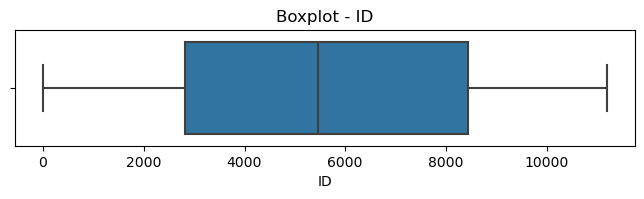

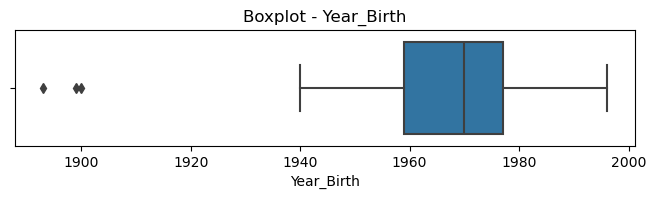

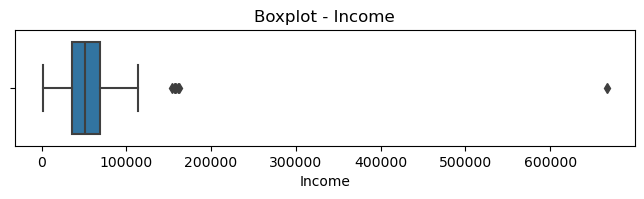

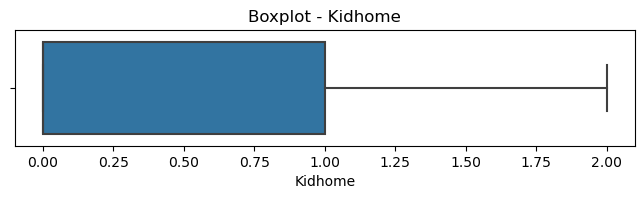

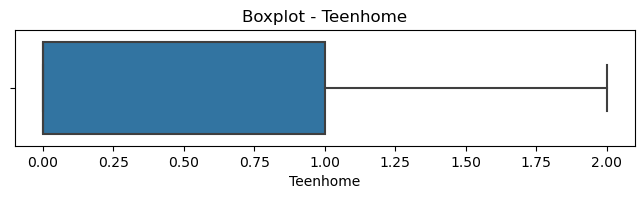

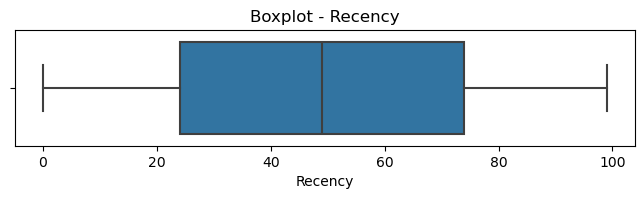

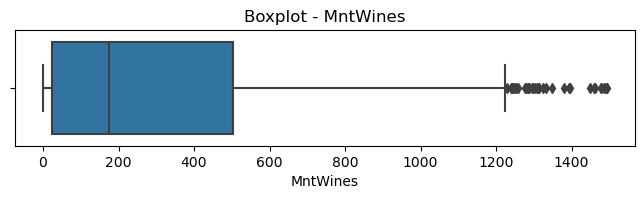

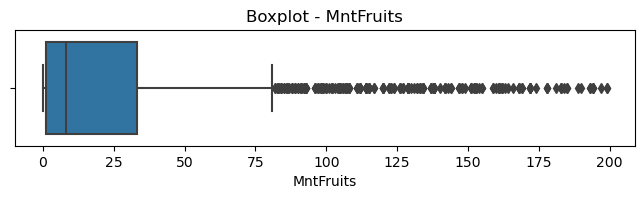

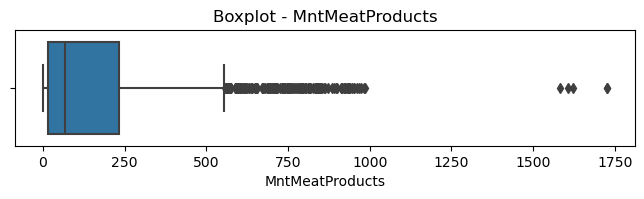

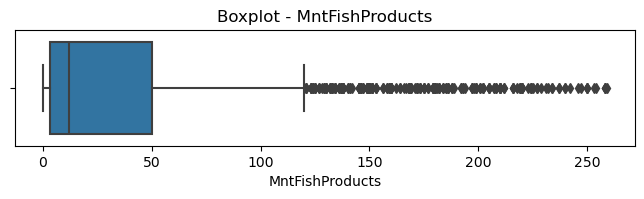

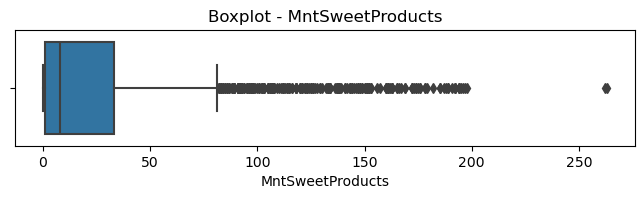

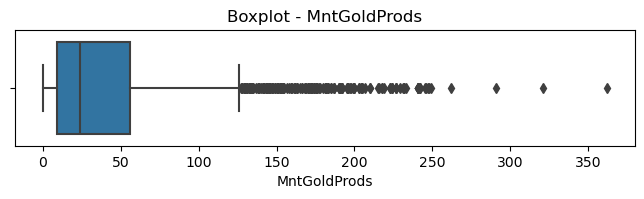

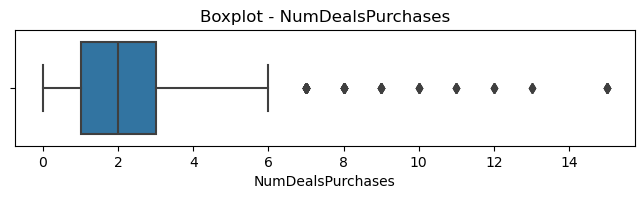

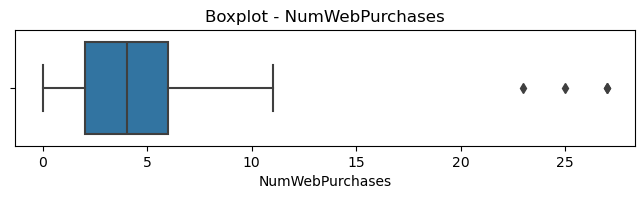

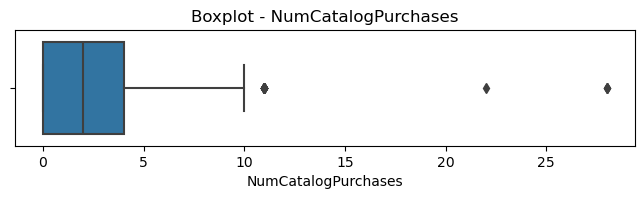

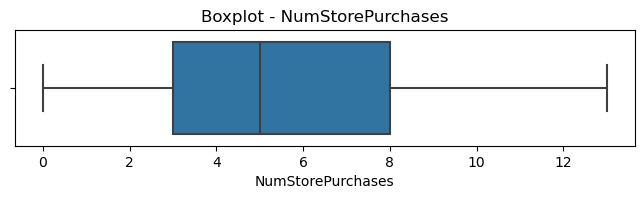

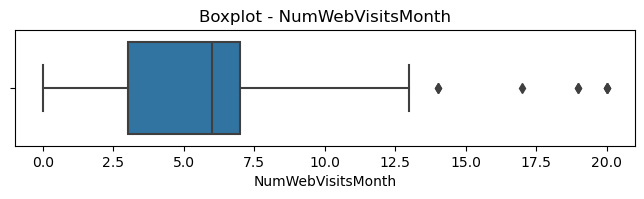

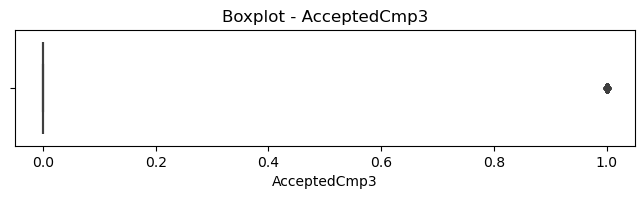

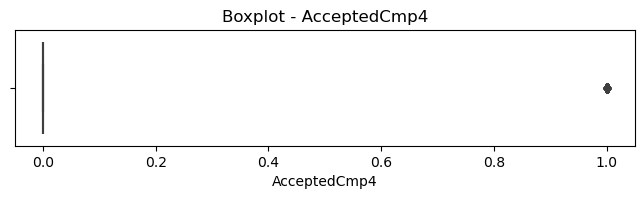

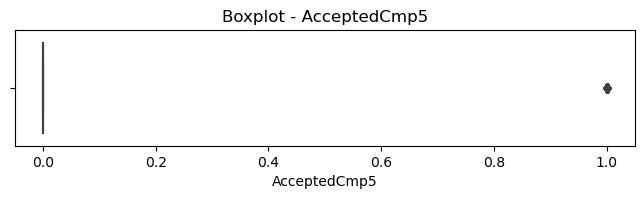

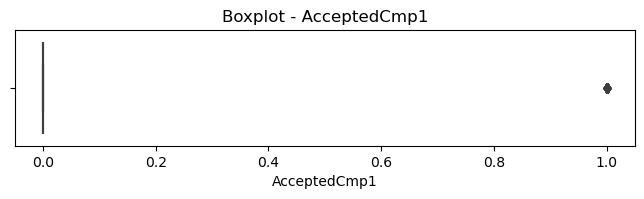

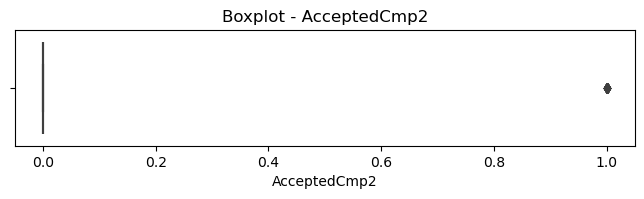

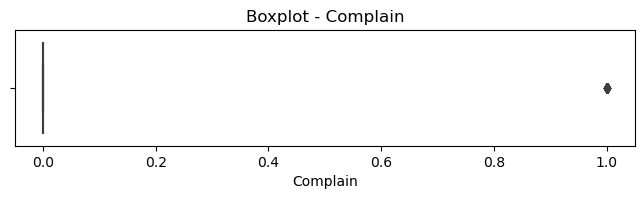

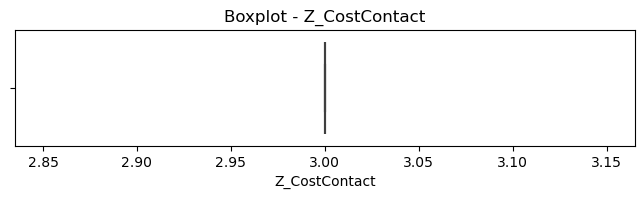

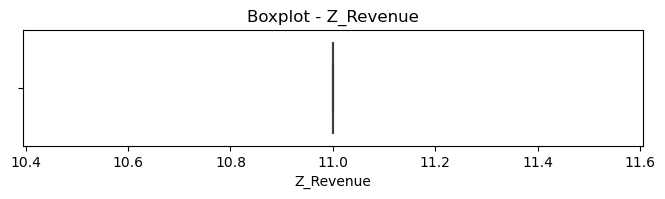

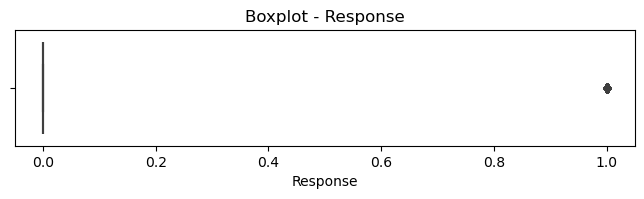

In [11]:
numeric_cols = dados.select_dtypes(include='number')
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(data=dados, x=col)
    plt.title(f'Boxplot - {col}')
    plt.show()

In [12]:
dados[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5"]].apply(pd.value_counts).T

C:\Users\gsous\AppData\Local\Temp\ipykernel_14568\1710758213.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  dados[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5"]].apply(pd.value_counts).T


,0,1
AcceptedCmp1,2096,144
AcceptedCmp2,2210,30
AcceptedCmp3,2077,163
AcceptedCmp4,2073,167
AcceptedCmp5,2077,163


In [13]:
#Tratamento dos dados

In [14]:
dados.duplicated().sum()

0

In [15]:
dados.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [16]:
#Variável Income(Salário):
#Primeiro, optamos por preencher com a mediana os dados ausentes, depois criamos um pequeno código para mostrar quantos dados atípicos temos nesta variável. Logo, com o uso dos pacotes Seaborn e Matplotlib,decidimos criar um gráfico para visualizar os outliers. 
#Observando o gráfico, foram detectados sete, verificamos que apesar de serem valores mais altos que a média, os sete são valores similares. Analisando as informações na planilha, para cada caso, observamos que são clientes com nível superior como graduação, master e PDh, com idades acima de 40 anos. Após as análises, optamos por deixar os valores já que podem sim ser sim dados reais de clientes que efetivamente ganham mais. 
#Com a intenção de que valores altos não prejudiquem a análises, optamos por usar a técnica capping, que consiste impor limites e substituir valores tanto inferiores quantos superiores pelos limites dos percentis, assim não existe a necessidade de excluir esses dados. 

In [17]:
#Substituir os valores ausentes pela mediana
dados['Income'].fillna(dados['Income'].median(), inplace=True)

In [18]:
# Mostrar a quantidade de Outliers
quantis_Income = dados['Income'].quantile([0.25, 0.5, 0.75])
Q1_Income = quantis_Income[0.25]
Q3_Income = quantis_Income[0.75]
IQR_Income = Q3_Income - Q1_Income
limite_inferior_Income = Q1_Income - 1.5 * IQR_Income
limite_superior_Income = Q3_Income + 1.5 * IQR_Income
outliers_Income = dados[(dados['Income'] < limite_inferior_Income) | (dados['Income'] > limite_superior_Income)]
print(f"Número de outliers: {len(outliers_Income)}")

Número de outliers: 8


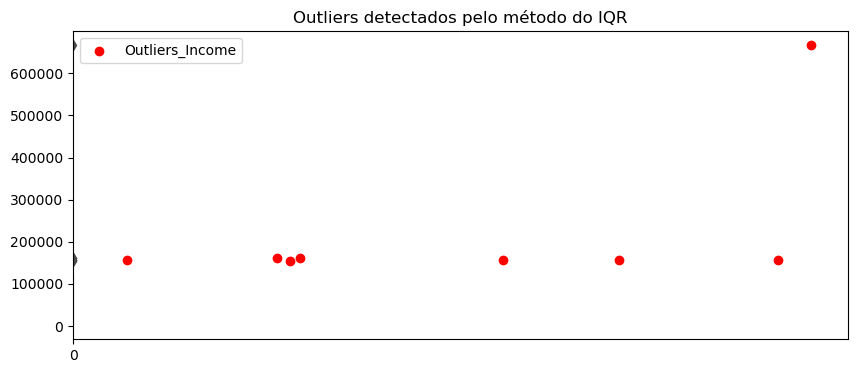

In [19]:
# Gráfico de dispersão mostrando os outliers em vermelho
plt.figure(figsize=(10, 4))
sns.boxplot(dados["Income"], color='b')
plt.scatter(outliers_Income.index, outliers_Income['Income'], color='r', label='Outliers_Income')
plt.legend()
plt.title('Outliers detectados pelo método do IQR')
plt.show()

In [20]:
print(outliers_Income[["ID", "Income"]].sort_values(by="Income"))

         ID    Income
655    5555  153924.0
2132  11181  156924.0
1653   4931  157146.0
164    8475  157243.0
1300   5336  157733.0
687    1501  160803.0
617    1503  162397.0
2233   9432  666666.0


In [21]:
# Substituindo valor alto pela mediana
dados.loc[dados['Income'] == 666666, 'Income'] = dados["Income"].median()

In [22]:
#Tecnica Capping
p1 = dados['Income'].quantile(0.01)
p99 = dados['Income'].quantile(0.99)
dados['Income'] = dados['Income'].clip(lower=p1, upper=p99)

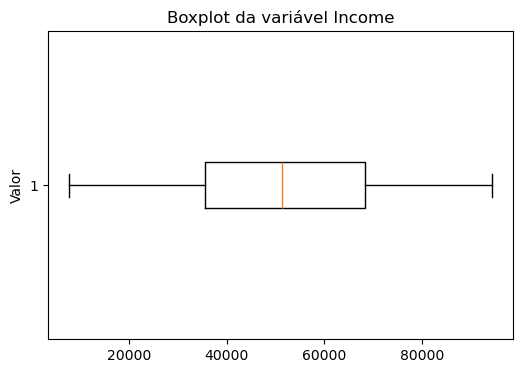

In [23]:
plt.figure(figsize=(6, 4))
plt.boxplot(dados['Income'], vert=False)
plt.title('Boxplot da variável Income')
plt.ylabel('Valor')
plt.show()

In [24]:
dados["Income"].min()

7705.92

In [25]:
dados["Income"].max()

94384.0

In [26]:
#Criação da variável, IncomeClass (Intervalo de valores),Para melhor análise optamos por criá-la, os intervalos foram separados com base no quartil, devido a distribuição dos valores. 

In [27]:
dados['IncomeClass'] = pd.qcut(dados['Income'], q=4, labels=['Very Low', 'Low', 'Medium', 'High'])

In [28]:
dados.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeClass
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,Medium
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,Low
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,High
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,Very Low
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,Medium


In [29]:
#Variável Year_Birth e criação da variável Age
#Está variavel indica apenas o ano de nascimento, optamos por criar a variável Age(Idade) já que nos facilitará a interpretação para futuras análises. 
#Realizamos o mesmo processo de detecção de outliers, três dados correspondem a pessoas acima de 100 anos. Dado que pode ser algum erro de digitação já que a expectativa de vida não é tão alta, optamos por excluir as três linhas. Sua exclusão não prejudicará a análise tendo em vista que estes dados são pequenos em vista ao tamanho do arquivo. Com a intenção de não alterar nossos dados originais, criarei outro dataframe chamado dataset.

In [30]:
ano_atual = 2025
dados["Age"] = ano_atual - dados["Year_Birth"]

In [31]:
dados.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeClass,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,Medium,68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,Low,71
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,High,60


In [32]:
# Mostrar a quantidade de Outliers
quantis_Age = dados['Age'].quantile([0.25, 0.5, 0.75])
Q1_Age = quantis_Age[0.25]
Q3_Age = quantis_Age[0.75]
IQR_Age = Q3_Age - Q1_Age
limite_inferior_Age = Q1_Age - 1.5 * IQR_Age
limite_superior_Age = Q3_Age + 1.5 * IQR_Age
outliers_Age = dados[(dados['Age'] < limite_inferior_Age) | (dados['Age'] > limite_superior_Age)]
print(f"Número de outliers: {len(outliers_Age)}")

Número de outliers: 3


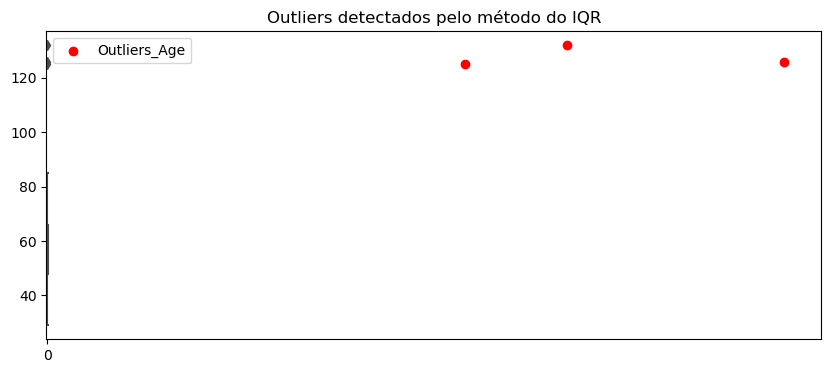

In [33]:
# Gráfico de dispersão mostrando os outliers em vermelho
plt.figure(figsize=(10, 4))
sns.boxplot(dados["Age"], color='b')
plt.scatter(outliers_Age.index, outliers_Age['Age'], color='r', label='Outliers_Age')
plt.legend()
plt.title('Outliers detectados pelo método do IQR')
plt.show()

In [34]:
print(outliers_Age[["ID", "Age"]].sort_values(by="Age"))

        ID  Age
192   7829  125
339   1150  126
239  11004  132


In [35]:
dataset = dados.drop([192,339,239])

In [36]:
dataset.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeClass,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,Medium,68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,Low,71
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,High,60


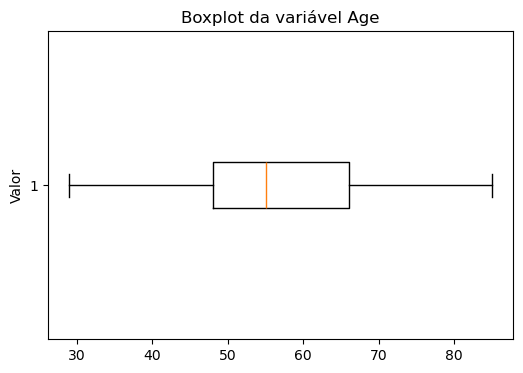

In [37]:
plt.figure(figsize=(6, 4))
plt.boxplot(dataset['Age'], vert=False)
plt.title('Boxplot da variável Age')
plt.ylabel('Valor')
plt.show()

In [38]:
dataset["Age"].min()

29

In [39]:
dataset["Age"].max()

85

In [40]:
#Criação da variável AgeClass, para facilitar a análise dos dados, optamos por agrupá-los. Os intervalos são por gerações onde: 
#28-34: Millennials, 35-44: Geração Xtemprana (Ger.X) 45-54: Geração Xtardia y Baby Boomers tempranos (Ger.X-BB) e 55+: Baby Boomers tardios e gerações anteriores (BB-others)

In [41]:
dataset['AgeClass'] = pd.cut(dataset['Age'], bins= [28,34,44,54,86], labels= ["Milennials","Ger.X","Ger.X-BB","BB-Others"], right=True)

In [42]:
dataset.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeClass,Age,AgeClass
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,Medium,68,BB-Others
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,Low,71,BB-Others
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,High,60,BB-Others
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,Very Low,41,Ger.X
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,Medium,44,Ger.X


In [43]:
#Criação da variável TotalExpense (TotalGasto), nos mostra o total de gasto de cada cliente no supermercado, também refletindo o total de ingresso por cada cliente. 

In [44]:
cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
dataset["TotalExpense"] = dataset[cols].sum(axis=1)

In [45]:
#Criação da variável Children(Crianças), 
#Por comodidade, somaremos as variáveis kidhome e Teenhome para criar apenas uma variável, já que a soma destas variáveis não afetará a análises. 

In [46]:
dataset["Children"]= dataset["Kidhome"]+dataset["Teenhome"]

In [47]:
#Na variável Marital_Status, substituímos as categorias, Yolo, Absurd e Alone para Single. 

In [48]:
dataset["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [49]:
dataset['Marital_Status'] = dataset['Marital_Status'].replace({'Alone': 'Single','YOLO': 'Single','Absurd': 'Single'})

In [50]:
#Alteração de nomes, por comodidade as variáveis relacionadas aos produtos e ao local de compra, serão renomeadas. 

In [51]:
dataset.rename(columns={'MntWines': 'Wines'}, inplace=True)
dataset.rename(columns={'MntFruits':'Fruits'}, inplace=True)
dataset.rename(columns={'MntFishProducts': 'Fish'}, inplace=True)
dataset.rename(columns={'MntMeatProducts': 'Meat'}, inplace=True)
dataset.rename(columns={'MntGoldProds': 'Gold'}, inplace=True)
dataset.rename(columns={'MntSweetProducts': 'Sweet'}, inplace=True)
dataset.rename(columns={'AcceptedCmp1': 'Cmp1'}, inplace=True)
dataset.rename(columns={'AcceptedCmp2': 'Cmp2'}, inplace=True)
dataset.rename(columns={"Marital_Status": "MaritalStatus"}, inplace=True)
dataset.rename(columns={"NumCatalogPurchases": "NumCatalog"}, inplace=True)
dataset.rename(columns={"NumStorePurchases": "NumStore"}, inplace=True)
dataset.rename(columns={"NumWebPurchases": "NumWeb"}, inplace=True)

In [52]:
dataset.head(3)

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Cmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeClass,Age,AgeClass,TotalExpense,Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,Medium,68,BB-Others,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,Low,71,BB-Others,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,High,60,BB-Others,776,0


In [53]:
#Exclusão de variáveis,
#Como mencionamos anteriormente as variáveis, Z_CostContact,  Z_ Revenue e Response não aportam dados relevantes, por tanto, excluiremos. 
#Também optamos por excluir as variáveis AcceptedCmp3 a AcceptedCmp5, já que adaptando a nossa situação o cliente realizou apenas duas campanhas de marketing. 
#Como, para esta situação, não analisaremos as reclamações, as variáveis Compain, Recency e Dt_Customer também serão excluídas. 
#Por último, no nosso exemplo, os clientes não fazem compras com cupons, por tanto a variável NumDealsPurchases, também será eliminada. 

In [54]:
dataset.drop(columns=["Year_Birth", "Kidhome", "Teenhome","NumDealsPurchases","Recency","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response","Dt_Customer","Complain", "Z_CostContact", "Z_Revenue", "NumWebVisitsMonth"],inplace=True)

In [55]:
dataset.head(1)

,ID,Education,MaritalStatus,Income,Wines,Fruits,Meat,Fish,Sweet,Gold,NumWeb,NumCatalog,NumStore,Cmp1,Cmp2,IncomeClass,Age,AgeClass,TotalExpense,Children
0,5524,Graduation,Single,58138.0,635,88,546,172,88,88,8,10,4,0,0,Medium,68,BB-Others,1617,0


In [56]:
#Primeiro reordenamos as variáveis dentro do arquivo, logo salvamos em formato csv para iniciar a análise de dados. O Arquivo é: dataset_tratado

In [57]:
dataset_tratado = dataset[["ID","Age","AgeClass","Education","MaritalStatus","Children", "Income","IncomeClass","Wines","Fruits","Meat","Fish","Sweet","Gold","TotalExpense","NumWeb","NumCatalog","NumStore","Cmp1","Cmp2"]]

In [58]:
dataset_tratado

,ID,Age,AgeClass,Education,MaritalStatus,Children,Income,IncomeClass,Wines,Fruits,Meat,Fish,Sweet,Gold,TotalExpense,NumWeb,NumCatalog,NumStore,Cmp1,Cmp2
0,5524,68,BB-Others,Graduation,Single,0,58138.0,Medium,635,88,546,172,88,88,1617,8,10,4,0,0
1,2174,71,BB-Others,Graduation,Single,2,46344.0,Low,11,1,6,2,1,6,27,1,1,2,0,0
2,4141,60,BB-Others,Graduation,Together,0,71613.0,High,426,49,127,111,21,42,776,8,2,10,0,0
3,6182,41,Ger.X,Graduation,Together,1,26646.0,Very Low,11,4,20,10,3,5,53,2,0,4,0,0
4,5324,44,Ger.X,PhD,Married,1,58293.0,Medium,173,43,118,46,27,15,422,5,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,58,BB-Others,Graduation,Married,1,61223.0,Medium,709,43,182,42,118,247,1341,9,3,4,0,0
2236,4001,79,BB-Others,PhD,Together,3,64014.0,Medium,406,0,30,0,0,8,444,8,2,5,1,0
2237,7270,44,Ger.X,Graduation,Divorced,0,56981.0,Medium,908,48,217,32,12,24,1241,2,3,13,0,0
2238,8235,69,BB-Others,Master,Together,1,69245.0,High,428,30,214,80,30,61,843,6,5,10,0,0


In [59]:
dataset_tratado.to_csv("dataset_tratado.csv",index=False)